1. Project description

The analysis aims to explore key attribute such as Age, Gender, Prize Category, Prize Share, Dates and Places of Birth and Death, and Affiliated Organization, using these data points to derive insight into Nobel Prize Winners’ demographics and behavior. By examining the Nobel Prize Winners dataset, we aim to uncover patterns and preference among the laureates, the winner of the noble prize, the year it happen and what country they are. Determining this will show the count of how many people that won the noble prize base on the category, their gender and their country.


2. Libraries and Data Handlinng

1. Importing libraries

In [144]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
warnings.filterwarnings('ignore')

2. Loading dataset

In [145]:
data = pd.read_csv('/content/10_Nobel Prize Winners Analysis.csv')
print(data.columns)

Index(['year', 'category', 'motivation', 'prizeShare', 'laureateID',
       'fullName', 'gender', 'born', 'bornCountry', 'bornCity', 'died',
       'diedCountry', 'diedCity', 'organizationName', 'organizationCountry',
       'organizationCity'],
      dtype='object')


3. Data Exploration

3.1 head

In [146]:
print(data.head())

   year    category                                         motivation  \
0  2023    medicine  for their discoveries concerning nucleoside ba...   
1  2023   economics  for having advanced our understanding of women...   
2  2023       peace  for her fight against the oppression of women ...   
3  2023  literature  for his innovative plays and prose which give ...   
4  2023   chemistry    for the discovery and synthesis of quantum dots   

   prizeShare  laureateID          fullName  gender        born bornCountry  \
0           2        1024    Katalin Kariko  female  17-01-1955     Hungary   
1           1        1034    Claudia Goldin  female  1946-00-00         USA   
2           1        1033  Narges Mohammadi  female  21-04-1972        Iran   
3           1        1032         Jon Fosse    male  29-09-1959      Norway   
4           3        1031     Alexei Ekimov    male  1945-00-00      Russia   

      bornCity        died diedCountry diedCity              organizationName  \

3.2 info

In [147]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   year                 1000 non-null   int64 
 1   category             1000 non-null   object
 2   motivation           1000 non-null   object
 3   prizeShare           1000 non-null   int64 
 4   laureateID           1000 non-null   int64 
 5   fullName             1000 non-null   object
 6   gender               1000 non-null   object
 7   born                 1000 non-null   object
 8   bornCountry          970 non-null    object
 9   bornCity             966 non-null    object
 10  died                 970 non-null    object
 11  diedCountry          652 non-null    object
 12  diedCity             646 non-null    object
 13  organizationName     736 non-null    object
 14  organizationCountry  733 non-null    object
 15  organizationCity     731 non-null    object
dtypes: int6

3.3 describe

In [148]:
print(data.describe())

              year   prizeShare   laureateID
count  1000.000000  1000.000000  1000.000000
mean   1973.721000     2.027000   509.099000
std      34.523195     0.944014   298.130617
min    1901.000000     1.000000     1.000000
25%    1949.750000     1.000000   250.750000
50%    1979.000000     2.000000   500.500000
75%    2003.000000     3.000000   764.250000
max    2023.000000     4.000000  1034.000000


4. Data cleaning and Preprocessing

4.1 Handling missing value

In [149]:
print(data.isnull().sum())

year                     0
category                 0
motivation               0
prizeShare               0
laureateID               0
fullName                 0
gender                   0
born                     0
bornCountry             30
bornCity                34
died                    30
diedCountry            348
diedCity               354
organizationName       264
organizationCountry    267
organizationCity       269
dtype: int64


<Axes: >

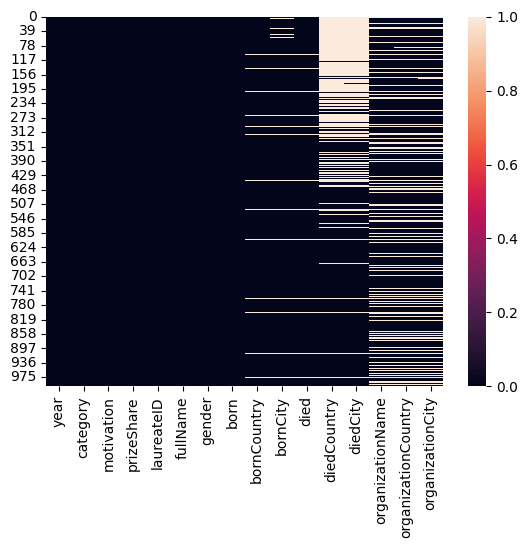

In [150]:
sns.heatmap(data.isnull())


In [151]:
data.duplicated().sum()

0

In [152]:
data.nunique()

year                   120
category                 6
motivation             690
prizeShare               4
laureateID             992
fullName               992
gender                   3
born                   968
bornCountry             88
bornCity               646
died                   653
diedCountry             48
diedCity               319
organizationName       322
organizationCountry     27
organizationCity       191
dtype: int64

In [153]:
data.describe(include="object")

,category,motivation,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity
count,1000,1000,1000,1000,1000,970,966,970,652,646,736,733,731
unique,6,690,992,3,968,88,646,653,48,319,322,27,191
top,medicine,for their discoveries of key regulators of the...,International Committee of the Red Cross,male,1961-00-00,USA,New York NY,0000-00-00,USA,Paris,University of California,USA,Cambridge MA
freq,227,3,3,905,4,292,55,306,240,29,36,385,53


In [154]:
data['died'].fillna('Unknown', inplace=True)
data['born'] = pd.to_datetime(data['born'], errors='coerce')
data['died'] = pd.to_datetime(data['died'], errors='coerce')
data['Age at Win'] = data['year'] - data['born'].dt.year
data.head()

,year,category,motivation,prizeShare,laureateID,fullName,gender,born,bornCountry,bornCity,died,diedCountry,diedCity,organizationName,organizationCountry,organizationCity,Age at Win
0,2023,medicine,for their discoveries concerning nucleoside ba...,2,1024,Katalin Kariko,female,1955-01-17,Hungary,Szolnok,NaT,NaN,NaN,Szeged University,Hungary,Szeged,68.0
1,2023,economics,for having advanced our understanding of women...,1,1034,Claudia Goldin,female,NaT,USA,New York NY,NaT,NaN,NaN,Harvard University,USA,Cambridge MA,NaN
2,2023,peace,for her fight against the oppression of women ...,1,1033,Narges Mohammadi,female,1972-04-21,Iran,Zanjan,NaT,NaN,NaN,NaN,NaN,NaN,51.0
3,2023,literature,for his innovative plays and prose which give ...,1,1032,Jon Fosse,male,1959-09-29,Norway,Haugesund,NaT,NaN,NaN,NaN,NaN,NaN,64.0
4,2023,chemistry,for the discovery and synthesis of quantum dots,3,1031,Alexei Ekimov,male,NaT,Russia,NaN,NaT,NaN,NaN,Nanocrystals Technology Inc.,USA,New York NY,NaN


4.2 Gender distribution of prize winners

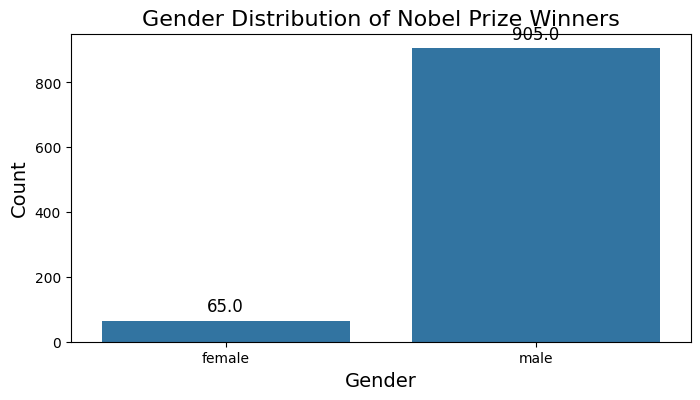

In [155]:
gender_data = data[data['gender'].isin(['male', 'female'])]
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='gender', data=gender_data,)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',
                fontsize=12, color='black')
plt.title('Gender Distribution of Nobel Prize Winners', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

4.3 Nobel prize distributio over the year

<Axes: xlabel='year', ylabel='prizeShare'>

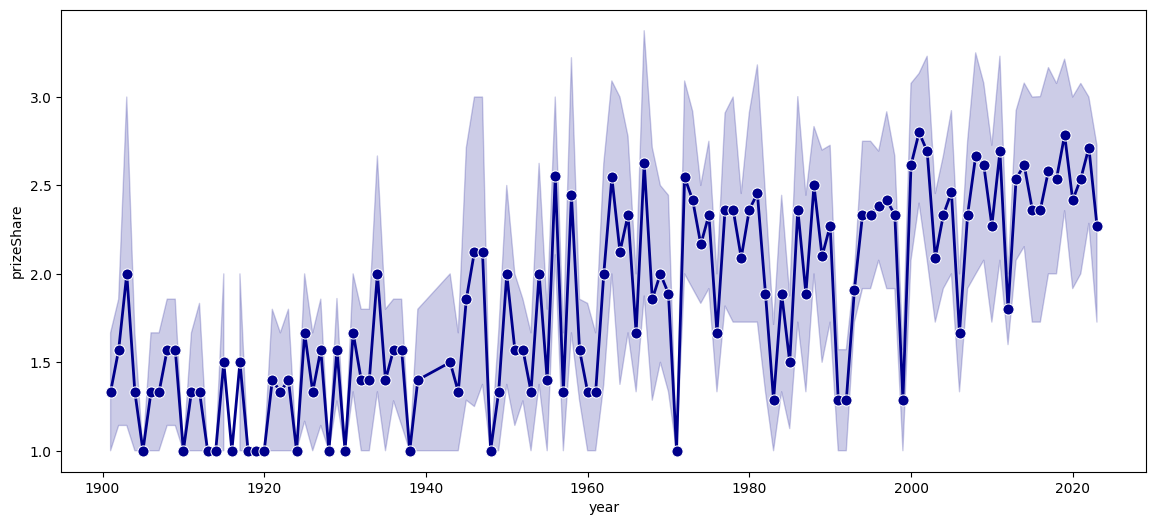

In [156]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='prizeShare', data=data, color=plot_style_line['color'], marker=plot_style_line['marker'],
markersize=plot_style_line['markersize'], linestyle=plot_style_line['linestyle'],
linewidth=plot_style_line['linewidth'])

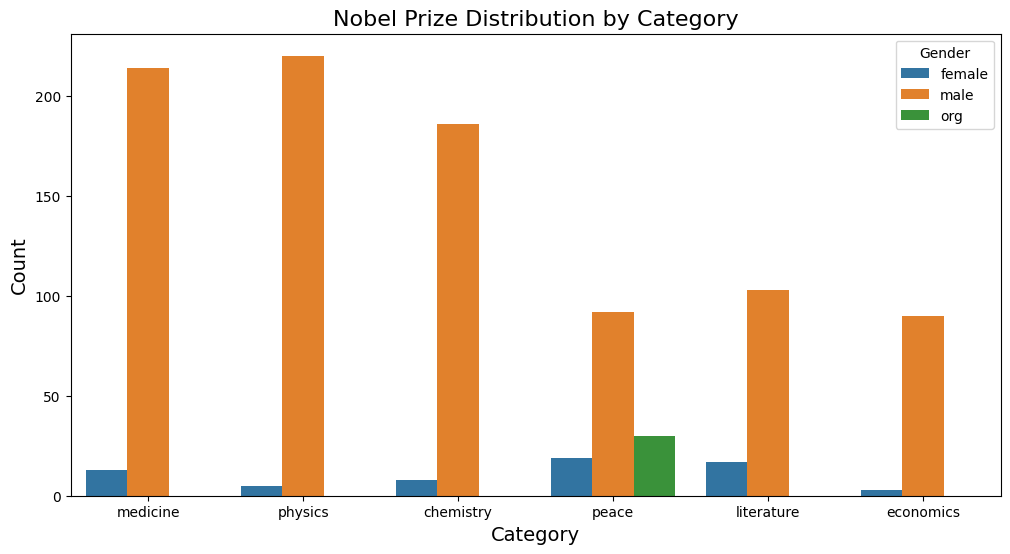

In [157]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='category',hue='gender', data=data, order=data['category'].value_counts().index)
plt.title('Nobel Prize Distribution by Category', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Gender')

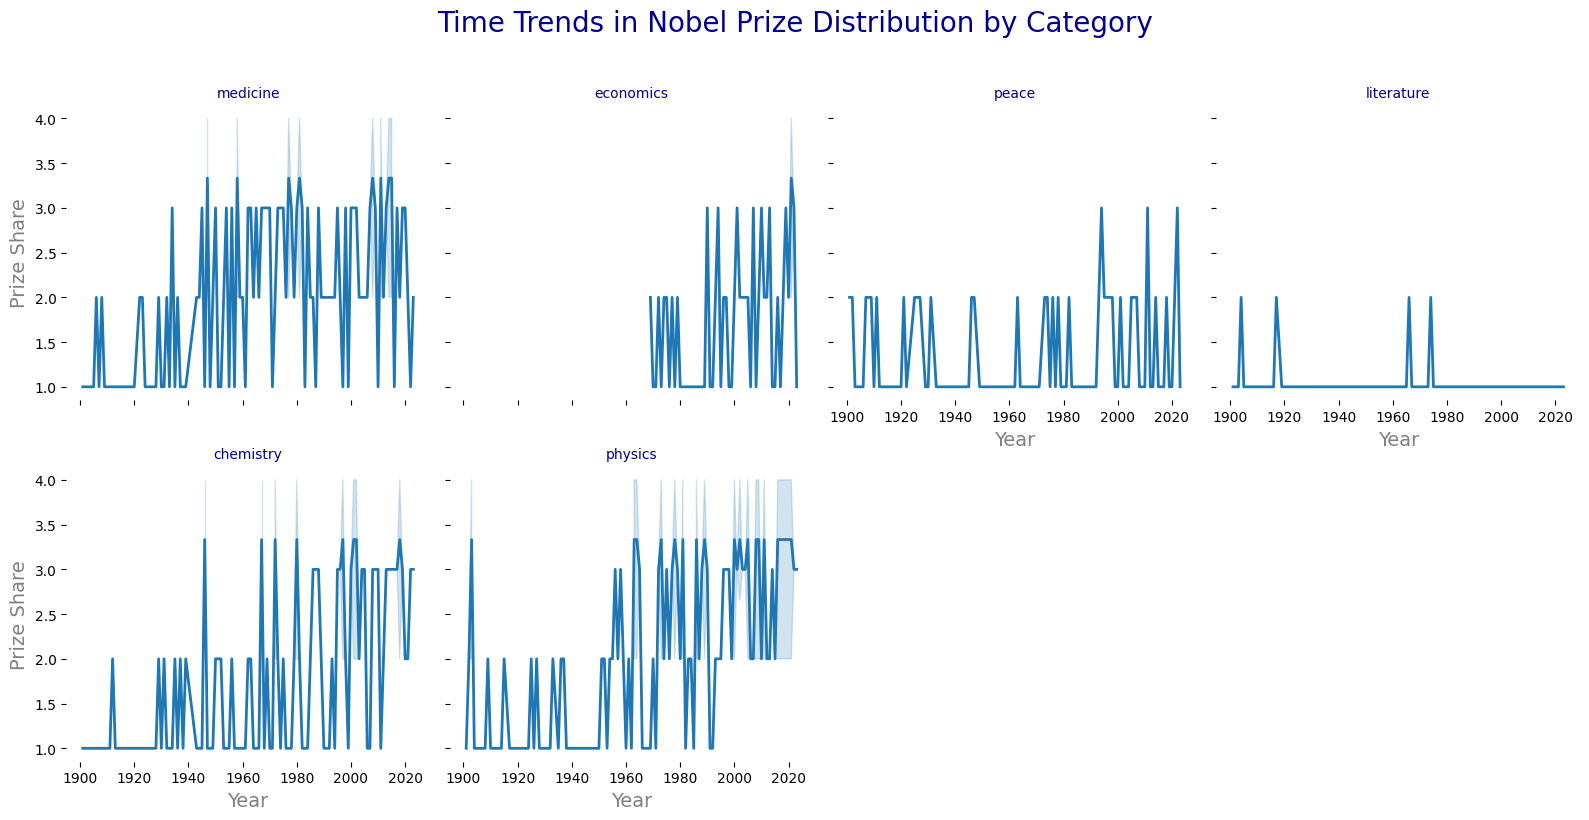

In [158]:
g = sns.FacetGrid(data, col='category', col_wrap=4, height=4)
g.map(sns.lineplot, 'year', 'prizeShare', linewidth=2)
g.set_titles(col_template="{col_name}", fontsize=16, color='darkblue')
g.fig.suptitle('Time Trends in Nobel Prize Distribution by Category', y=1.02, fontsize=20, color='darkblue')
g.set_axis_labels('Year', 'Prize Share', fontsize=14, color='gray')
g.fig.tight_layout(rect=[0, 0, 1, 0.96])
g.fig.subplots_adjust(top=0.9)
g.despine(left=True, bottom=True)

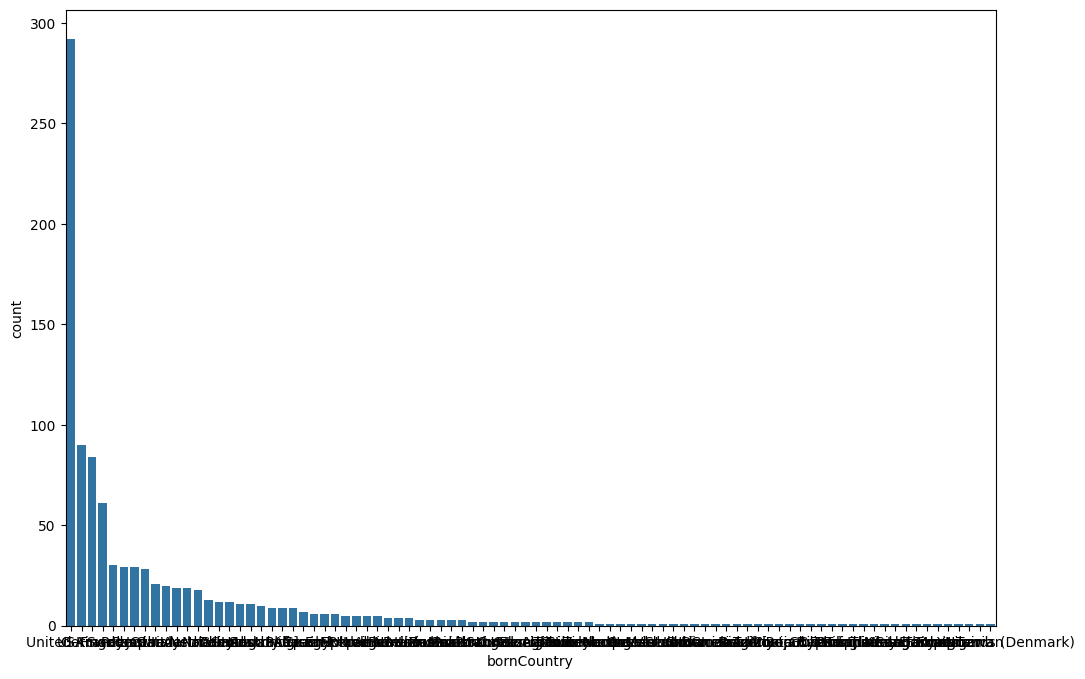

In [159]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='bornCountry', data=data, order=data['bornCountry'].value_counts().index)

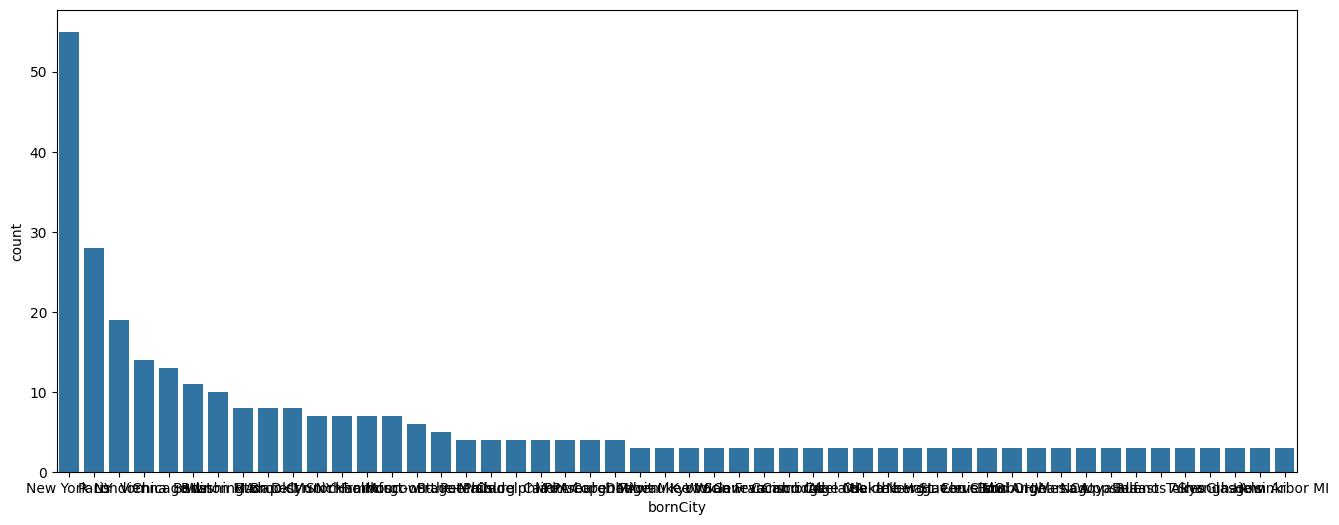

In [160]:
top_cities = data['bornCity'].value_counts().head(50)
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='bornCity', data=data, order=top_cities.index)

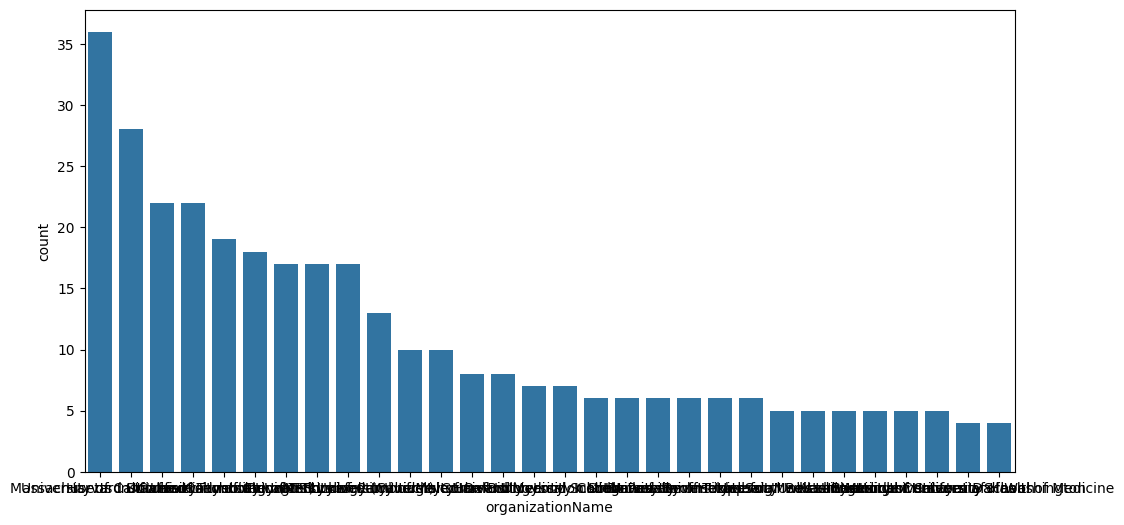

In [161]:
top_organizations = data['organizationName'].value_counts().head(30)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='organizationName', data=data, order=top_organizations.index)

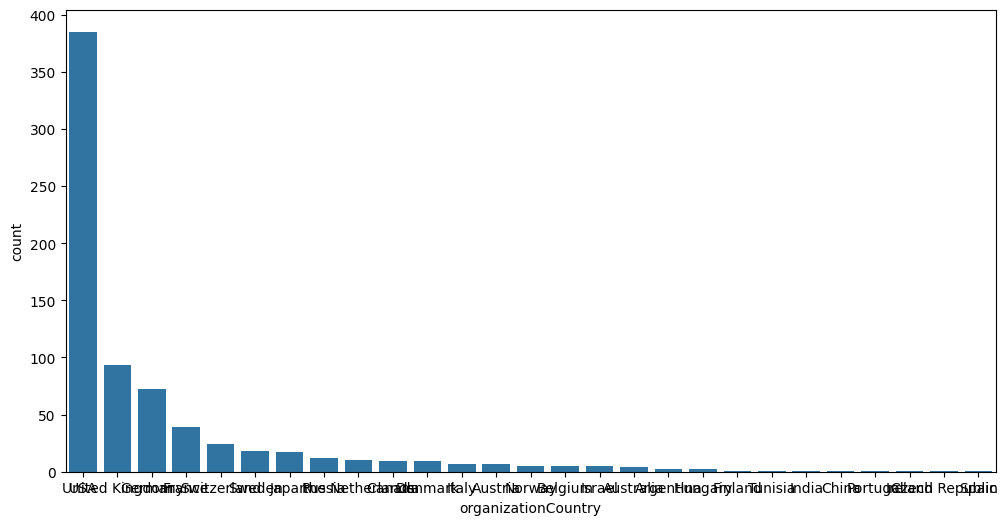

In [162]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='organizationCountry', data=data, order=data['organizationCountry'].value_counts().index)

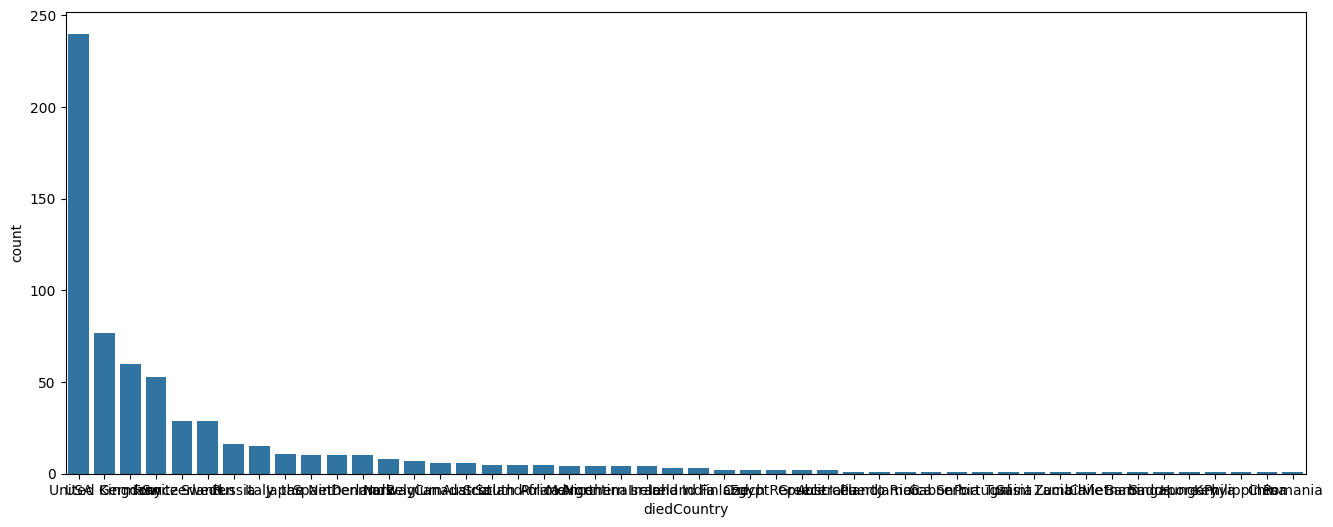

In [163]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(x='diedCountry', data=data, order=data['diedCountry'].value_counts().index)

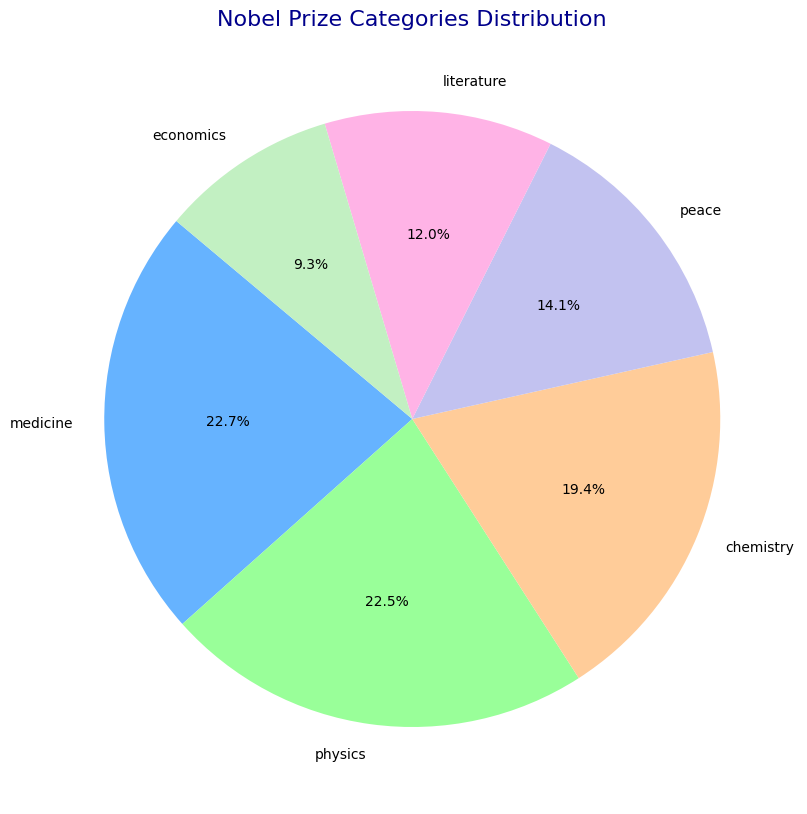

In [164]:
category_distribution = data['category'].value_counts()
custom_palette = ["#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6", "#c2f0c2"]
plot_style_pie_chart = {
    'title': {'text': 'Nobel Prize Categories Distribution', 'fontsize': 16, 'color': 'darkblue'}
}
plt.figure(figsize=(10, 10))
plt.pie(category_distribution, labels=category_distribution.index, autopct='%1.1f%%', startangle=140, colors=custom_palette)
plt.title(plot_style_pie_chart['title']['text'], fontsize=plot_style_pie_chart['title']['fontsize'], color=plot_style_pie_chart['title']['color'])
plt.show()

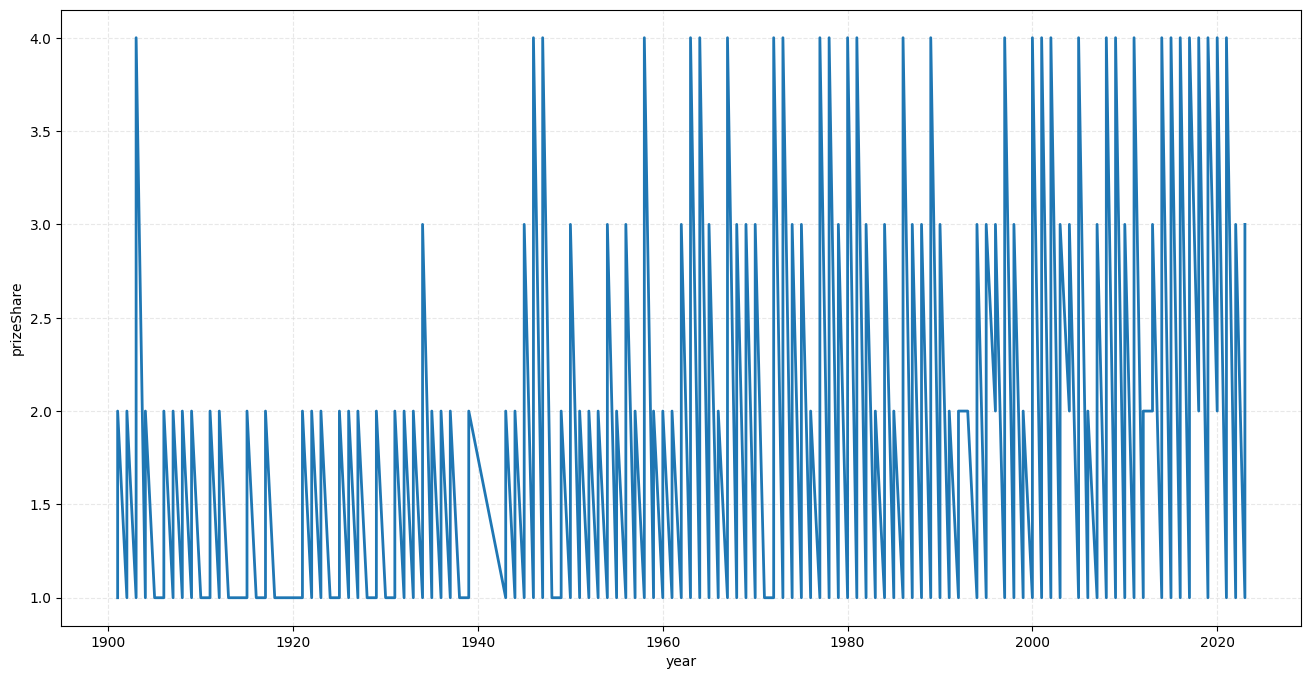

In [165]:
male_data = data[data['gender'] == 'male']
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='prizeShare', data=male_data, estimator=None, lw=2)
plt.grid(axis='both', linestyle='--', alpha=0.5, color='lightgray')
plt.show()

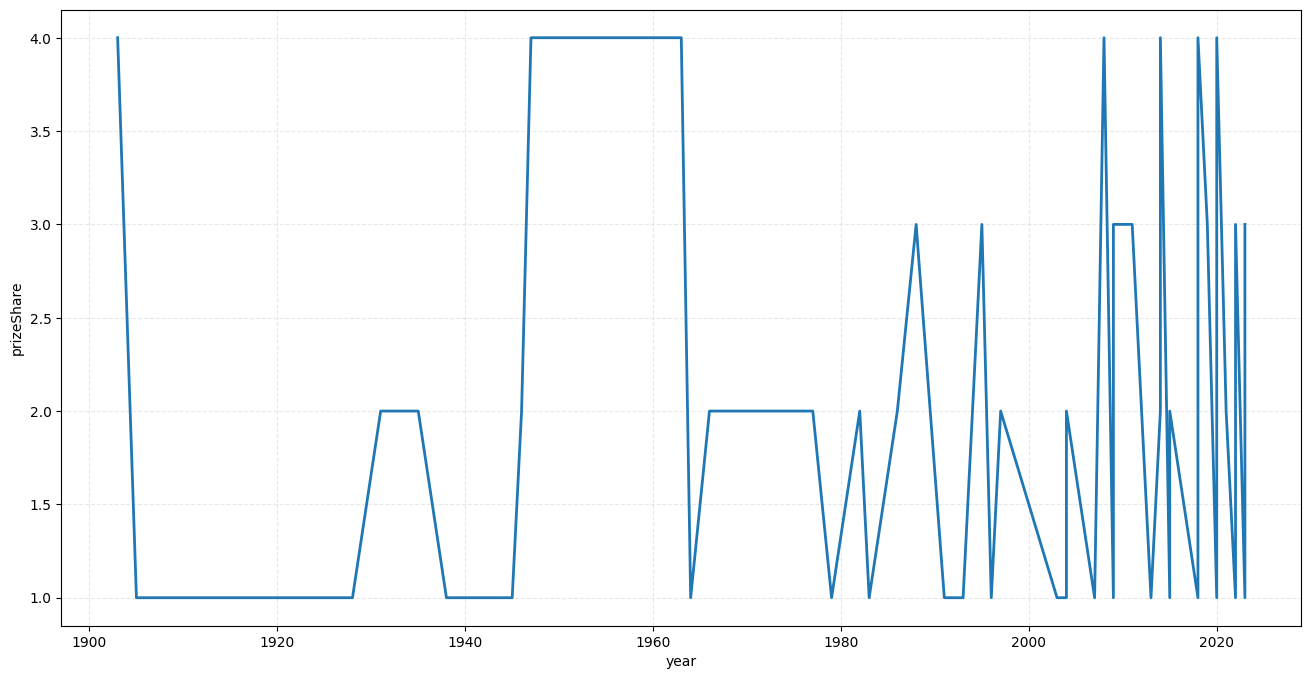

In [166]:
female_data = data[data['gender'] == 'female']
plt.figure(figsize=(16, 8))
sns.lineplot(x='year', y='prizeShare', data=female_data, estimator=None, lw=2)
plt.grid(axis='both', linestyle='--', alpha=0.5, color='lightgray')
plt.show()